## SETUP

In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data.data_processor import DataProcessor
from src.rai.plotters.plotter import Plotter
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

## Get data


In [106]:
database = pd.read_csv('https://archive.ics.uci.edu/static/public/29/data.csv')
database.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


## Cleaning data

In [107]:
cleaned_database = database.drop(columns=['VendorName', 'ModelName', 'PRP'])
cleaned_database.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
0,125,256,6000,256,16,128,199
1,29,8000,32000,32,8,32,253
2,29,8000,32000,32,8,32,253
3,29,8000,32000,32,8,32,253
4,29,8000,16000,32,8,16,132


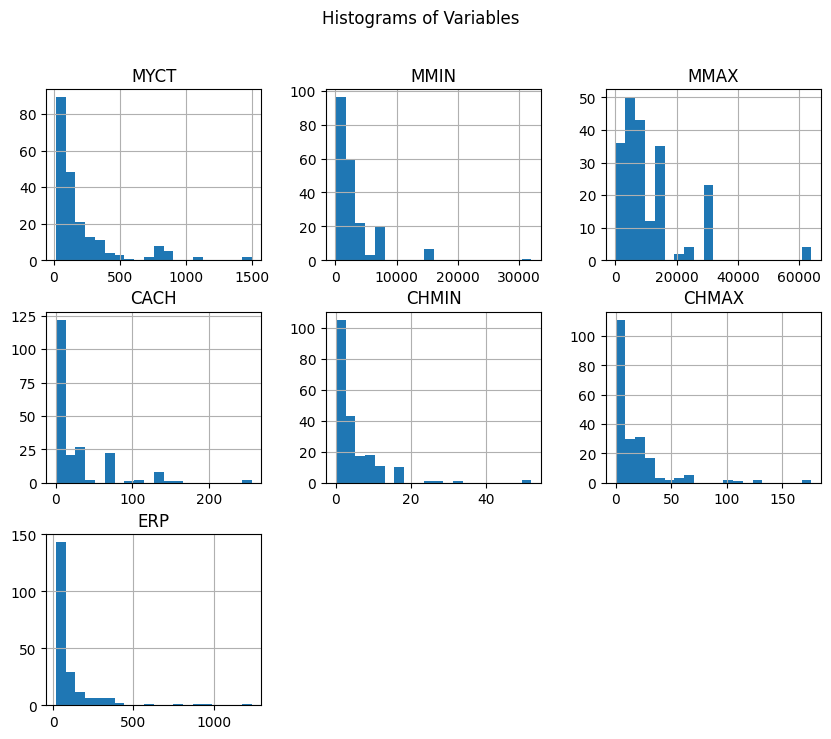

In [108]:
Plotter.plot_hist(cleaned_database)

## Preprocessing

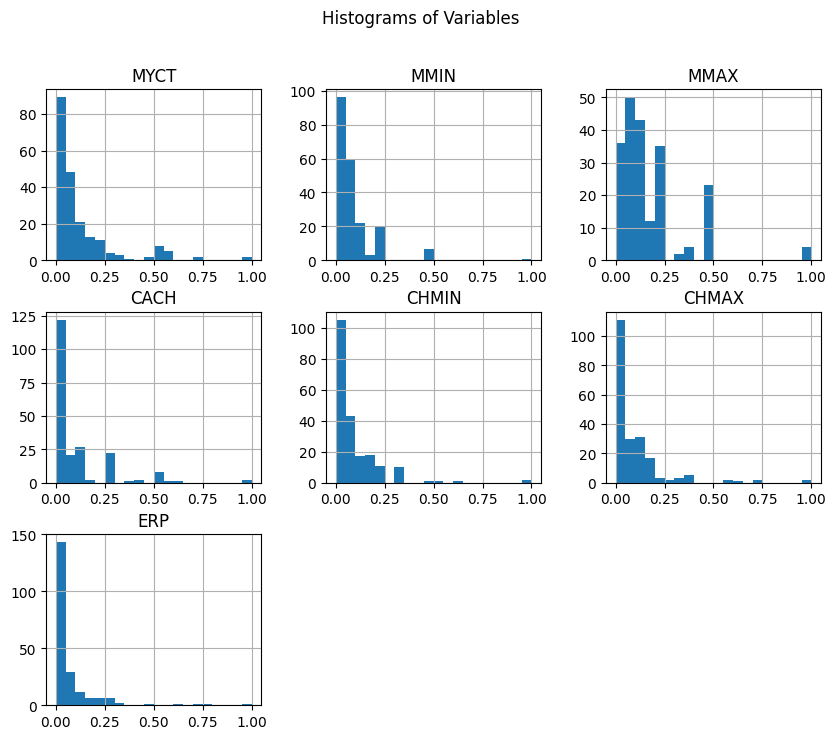

In [109]:
shuffled_data = DataProcessor.shuffle_data(cleaned_database)

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(shuffled_data)
normalized_data = pd.DataFrame(normalized_data, columns=shuffled_data.columns)

Plotter.plot_hist(normalized_data)

In [110]:
correlations = DataProcessor.calculate_correlation(normalized_data, 'ERP')
correlations

MYCT    -0.288396
MMIN     0.819292
MMAX     0.901202
CACH     0.648620
CHMIN    0.610580
CHMAX    0.592156
Name: ERP, dtype: float64

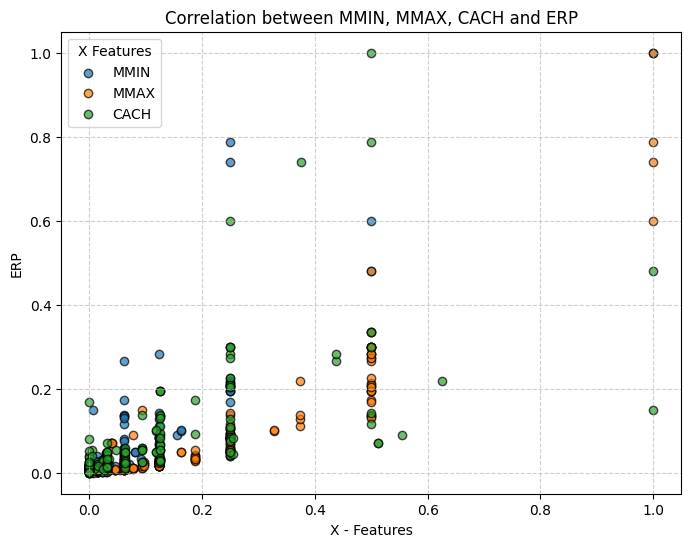

In [111]:
x_columns = ['MMIN', 'MMAX', 'CACH']
y_column = 'ERP'
Plotter.plot_correlations(normalized_data, y_column, x_columns)

## Split data

In [112]:
train_data, validation_data, test_data = DataProcessor.split_data(data=normalized_data, train_ratio=0.6,
                                                                  validation_ratio=0.2)